# Project Name : Predicting the Road Surface Quality Score using 
#                           Regression Models


### Input Files      : 

#### 1)  ./ML_ANNOTATOR/HistScore.csv for 10 bins

#### 2) ./ML_ANNOTATOR/hist16bin.csv for 16bins


These input files contain the already extracted histogram of image data using 10 bins and 16 bins respectively.The column names Histogram1,Histogram2..... i.e Histogrami indicate the number of pixels in the ith bin.

This input data is used in various models below.Running the code directly in this notebook in order can show the desired outputs.

###### Additional Information :

The code for extracting the histogram of image into different bin sizes of 10 and 16 are shown in CreateHist(10bins).ipynb and CreateHist(16bins).ipynb

README.txt file has more detailed steps about starting from the scratch working with the original image dataset.



# Overview of the code


## Part  1  (Using the 10 bins dataset in our models)

#### A.1 : Correlation matrix (10 bins)

#### A.2 : Regression using top 5 highly correlated features

Since the top 5 correlated features show similar predictions as using all 10 bins, we focus on using all 10 bins (all columns) in the models below.The below code is the primary part of the project.

###    B : Comparing three different models : Linear,SVR and Neural Networks using  all 10 bins

#### B.1 : Read the data from csv file to a dataframe (10 bins )

#### B.2 : Linear Regression on 10 bins

#### B.3 : SVR model 10 bin

#### B.4 : Neural Network 10 bins 

#### B.5 : Comparing RMSE of various models (10 bins)


## Part  2 :  (Using the 16 bins dataset in our models)


#### A.1 : Correlation matrix for 16 bin data

#### A.2 : Regression models on 16 bin data using the top 5 highly correlated features

Since the top 5 correlated features show similar predictions as using all 16 bins, we focus on using all 16 bins (all columns) in the models below.The below code is the primary part of the project.

###    B : Comparing three different models : Linear,SVR and Neural Networks using  all 16 bins

#### B.1 : Reading from csv file to dataframe (16 bins)

#### B.2 : Linear Regression on 16 bins

#### B.3 : SVR 16 bin

#### B.4 : Neural Network 16 bins

#### B.5 : A comparision of RMSE for different regression models (16 bin)







# All imports 

In [1]:
import os  
import warnings
warnings.filterwarnings('ignore')
import numpy as np  
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt  
%matplotlib inline
from scipy import misc
import matplotlib.image as mpimg
import csv  
import sys
from collections import defaultdict



# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cross_validation import train_test_split



C:\Users\Sindhu-Phani\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#                 Part 1 - Using the 10 bins dataset in our models

# A.1 : Correlation matrix (10 bins)

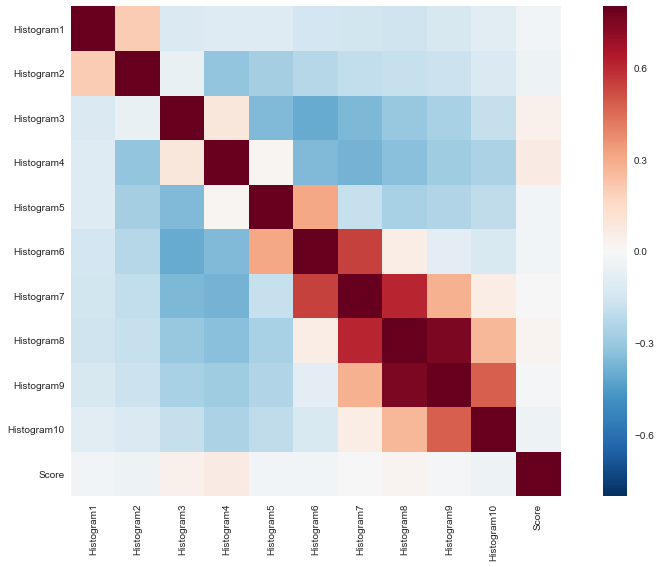

In [2]:

data = pd.read_csv("./ML_ANNOTATOR/HistScore.csv")

# create a Python list of feature names
feature_names = ['Histogram1','Histogram2','Histogram3','Histogram4','Histogram5','Histogram6','Histogram7','Histogram8','Histogram9','Histogram10','Score']

# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
y = data.Score

# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=121)


import numpy as np
import seaborn as sns
#correlation matrix
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

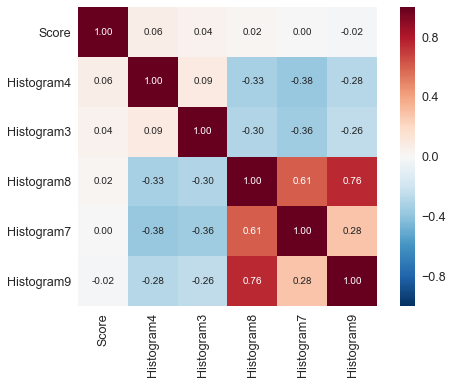

['Histogram4', 'Histogram3', 'Histogram8', 'Histogram7', 'Histogram9']


In [3]:
#saleprice correlation matrix
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Score')['Score'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

feat=list(cols)

feat.remove('Score')
print(feat)

# A.2 : Regression using top 5 highly correlated features

In [4]:
df = pd.read_csv("./ML_ANNOTATOR/HistScore.csv")
print(df.values)

bins=10
header=[]
for i in range(1,bins+1,1):
    stringHeader="Histogram"+str(i)
    header.append(stringHeader)
#header.append("Score")
print(header)



# ************************************************************************************
# NEWLY ADDED TRY TO REMOVE -1's
df = df[df.Score != -1]

# **********************************************************************

#df.Score=np.log1p(df.Score)
df=np.log1p(df)

# Normalization

df = (df - df.mean()) / df.std()  
df.head()  







# feature_names = feat

feature_names = feat
X = df[feature_names]
# X is feature vector,y is target variable
y = df.Score


#train.SalePrice = np.log1p(train.SalePrice)
# Rescale data (between 0 and 1)

scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
numpy.set_printoptions(precision=3)

y = scaler.fit_transform(y)

# Splitting X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(rescaledX, rescaledy,test_size=0.3, random_state=108)
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y,test_size=0.3,random_state=121)




[[ 1917  4448  2798 ...,   137    63     2]
 [    0    12  1096 ...,    33    26     2]
 [  916 36508 10038 ...,     0     0     0]
 ..., 
 [ 2037  2787 18358 ...,     0     0     2]
 [16246 10474  5237 ...,   593  2132     1]
 [ 1519 15533 30155 ...,    35     0     0]]
['Histogram1', 'Histogram2', 'Histogram3', 'Histogram4', 'Histogram5', 'Histogram6', 'Histogram7', 'Histogram8', 'Histogram9', 'Histogram10']


C:\Users\Sindhu-Phani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Sindhu-Phani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,Root Mean Square Error
Linear,0.373011
Ridge,0.372723
Bayesian Ridge,0.372556
Hubber,0.373294
Lasso,0.372738
Bagging,0.429789
RandomForest,0.431924
AdaBoost,0.377028
SVR RBF,0.389400
SVR Linear,0.392664


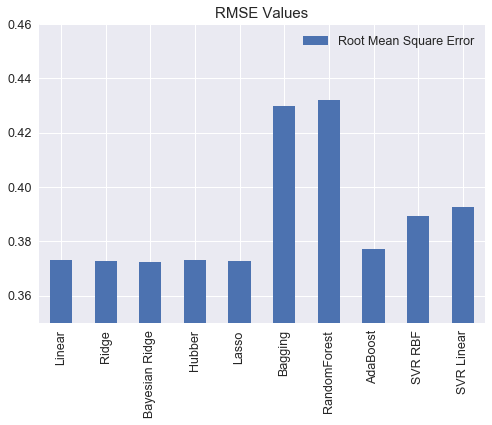

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor as AndaBooster
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import seaborn
import warnings
warnings.filterwarnings('ignore')


from sklearn import model_selection
def all_models(train,labels):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=10,shuffle=True,random_state=8)
        scoring = 'neg_mean_squared_error'
        results = cross_val_score(clf, train, labels, cv=cv,scoring=scoring)
        clf.fit(X_train,y_train)
        #scores=[np.sqrt(results.mean())]
        pred = clf.predict(X_test)
        scores=[np.sqrt(mean_squared_error(y_test, pred))]
        #print(scores)
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AndaBooster()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVR RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVR Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Root Mean Square Error"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="RMSE Values")
    axes = plt.gca()
    #axes.set_ylim([0.301,0.360])
    axes.set_ylim([0.350,0.460])
    return results

#lets_try(X,y)

all_models(X_train,y_train)

# B : Comparing three different models : Linear,SVR and Neural Networks using     all 10 bins

#  B.1 : Read the data from csv file to a dataframe (10 bins )

In [6]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("./ML_ANNOTATOR/HistScore.csv")
print(df.values)

bins=10
header=[]
for i in range(1,bins+1,1):
    stringHeader="Histogram"+str(i)
    header.append(stringHeader)

print(header)


# Ignoring scores with -1
df = df[df.Score != -1]

#print("before log")
#print(df.Score[:5])

df=np.log1p(df)

#print("after log")
#print(df.Score[:5])
# Normalization

#df = (df - df.mean()) / df.std()  
#df.head()  

#print("after norm")
#print(df.Score[:5])

feature_names = header

X = df[feature_names]
# X is feature vector,y is target variable

y = df.Score

# Rescale data (between 0 and 1)

#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
numpy.set_printoptions(precision=3)

y = scaler.fit_transform(y)

#print("after scale")
#print(y[:5])

# Splitting X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(rescaledX, rescaledy,test_size=0.3, random_state=108)
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y,test_size=0.3,random_state=121)

result10={}



[[ 1917  4448  2798 ...,   137    63     2]
 [    0    12  1096 ...,    33    26     2]
 [  916 36508 10038 ...,     0     0     0]
 ..., 
 [ 2037  2787 18358 ...,     0     0     2]
 [16246 10474  5237 ...,   593  2132     1]
 [ 1519 15533 30155 ...,    35     0     0]]
['Histogram1', 'Histogram2', 'Histogram3', 'Histogram4', 'Histogram5', 'Histogram6', 'Histogram7', 'Histogram8', 'Histogram9', 'Histogram10']


# B.2 : Linear Regression on 10 bins

In [7]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

 
#print(pipeline.get_params())

# hyperparameters to tune

hyperparameters = {'linearregression__fit_intercept':[True,False], 'linearregression__normalize':[True,False],'linearregression__copy_X':[True,False]}

# 7. Tune model using cross-validation pipeline

clf = GridSearchCV(make_pipeline(linear_model.LinearRegression()),hyperparameters, cv=10)

clf.fit(X_train, y_train)
 
#print(clf.get_params())

# 9. Evaluate model pipeline on test data

pred = clf.predict(X_test)

print("The best parameters are :")

print(clf.best_params_)
 

# calculate MAE, MSE, RMSE

print("MAE")
print(metrics.mean_absolute_error(y_test, pred))
print("MSE")
print(metrics.mean_squared_error(y_test, pred))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))



result10["Linear"]=np.sqrt(metrics.mean_squared_error(y_test, pred))


# Predictions

#pred1 = scaler.inverse_transform(clf.predict(X_test))
#inversedPred=np.expm1(pred1)
#print("Predictions")
#print(pred[0:10])
#print(y_test[0:10])





The best parameters are :
{'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__normalize': True}
MAE
0.311920329188
MSE
0.137318367796
RMSE
0.370564930608


# B.3 : SVR model 10 bin

In [8]:
# 2. Import libraries and modules



from sklearn.svm import SVR
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn import svm, grid_search
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
   
    
# hyperparameters to tune

hyperparameters = {'svr__C':[0.001, 0.01, 0.1, 1], 'svr__gamma':[0.001, 0.01, 0.1, 1], 'svr__kernel': ['linear','poly','rbf','sigmoid'] }


# 7. Tune model using cross-validation pipeline

clf = GridSearchCV(make_pipeline(svm.SVR()), hyperparameters, cv=10)
 
clf.fit(X_train, y_train)


#print(clf.get_params())
print("The best parameters are ")
print(clf.best_params_)

# 9. Evaluate model pipeline on test data

pred = clf.predict(X_test)

# calculate MAE, MSE, RMSE

print("MAE")
print(metrics.mean_absolute_error(y_test, pred))
print("MSE")
print(metrics.mean_squared_error(y_test, pred))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


result10["SVR"]=np.sqrt(metrics.mean_squared_error(y_test, pred))








The best parameters are 
{'svr__C': 0.1, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
MAE
0.32723609566
MSE
0.152467050187
RMSE
0.390470293604


# Comparing SVR hyperparameters (10 bins)

(0.38, 0.4)

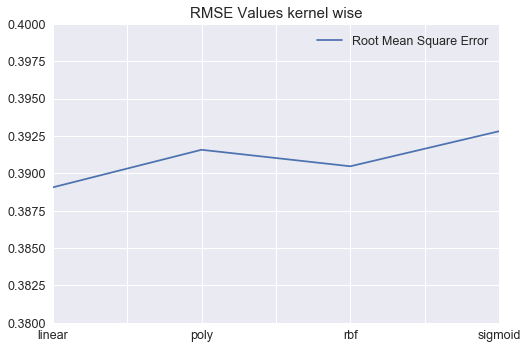

In [9]:
plotSvmKernels={}
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k,C=0.1,gamma=1)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotSvmKernels[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotSvmKernels,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="line",title="RMSE Values kernel wise")
axes = plt.gca()
axes.set_ylim([0.380,0.400])
    

(0.38, 0.4)

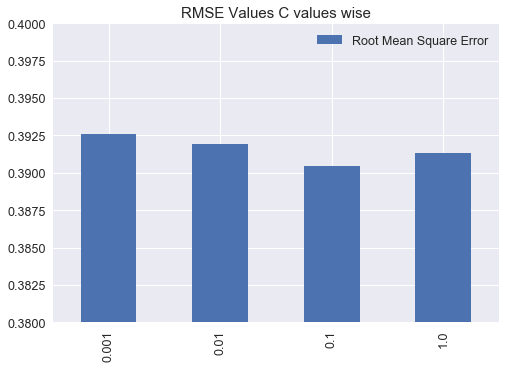

In [10]:
plotSvmCs={}
for k in [0.001, 0.01, 0.1,1]:
    clf = svm.SVR(kernel='rbf',C=k,gamma=1)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotSvmCs[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotSvmCs,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values C values wise")
axes = plt.gca()
axes.set_ylim([0.380,0.400])
    

(0.32, 0.9)

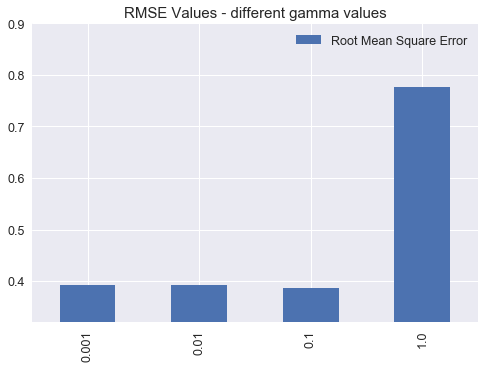

In [11]:
plotSvmgamma={}
for k in [0.001, 0.01, 0.1, 1]:
    clf = svm.SVR(kernel='sigmoid',gamma=k,C=1)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotSvmgamma[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotSvmgamma,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different gamma values")
axes = plt.gca()
axes.set_ylim([0.320,0.9])
    

# B.4 : Neural Network 10 bins 

In [12]:
# 2. Import libraries and modules



from sklearn.svm import SVR
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn import svm, grid_search
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

 

from sklearn.neural_network import MLPRegressor 

# hyperparameters to tune

hyperparameters= {'mlpregressor__hidden_layer_sizes': [3,4,5,8,10,12,20,30,50,80],'mlpregressor__activation': ['identity','tanh','relu'] ,'mlpregressor__solver' : ['lbfgs','sgd','adam']}                      

# Tune model using cross-validation pipeline

clf = GridSearchCV(make_pipeline(preprocessing.MinMaxScaler(),MLPRegressor(random_state = 8,shuffle=True)), hyperparameters, cv=10)
 
clf.fit(X_train, y_train)



#print(clf.get_params())

print("The best parameters are :")
print(clf.best_params_) 

# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)

# calculate MAE, MSE, RMSE
print("MAE")
print(metrics.mean_absolute_error(y_test, pred))
print("MSE")
print(metrics.mean_squared_error(y_test, pred))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))



result10["NN"]=np.sqrt(metrics.mean_squared_error(y_test, pred))




The best parameters are :
{'mlpregressor__activation': 'relu', 'mlpregressor__hidden_layer_sizes': 80, 'mlpregressor__solver': 'adam'}
MAE
0.318820948843
MSE
0.140061225675
RMSE
0.374247545984


# Comparing different hyperparameters for NN (10 bins)

(0.32, 0.43)

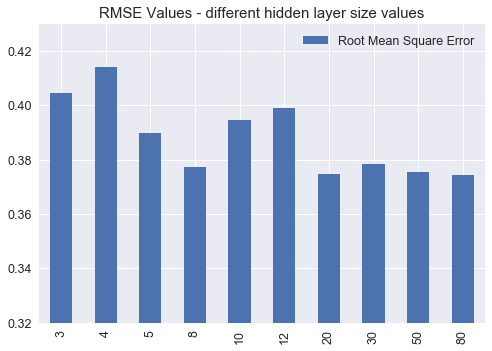

In [13]:
plotNNHiddenLayers={}
for k in [3,4,5,8,10,12,20,30,50,80]:
    clf = MLPRegressor(random_state=8,shuffle=True,hidden_layer_sizes=k,activation='relu',solver='adam')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNHiddenLayers[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNHiddenLayers,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different hidden layer size values")
axes = plt.gca()
axes.set_ylim([0.320,0.430])
    

(0.32, 0.4)

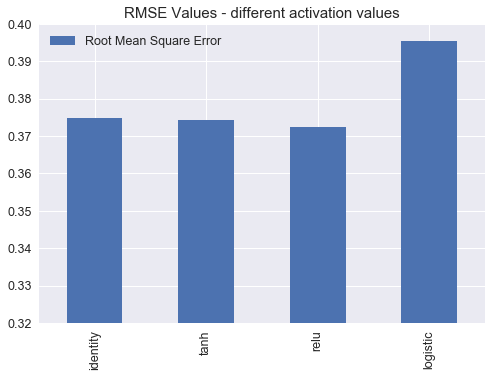

In [14]:
plotNNActivation={}
for k in ['identity','tanh','relu','logistic']:
    clf = MLPRegressor(random_state=8,shuffle=True,activation=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNActivation[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNActivation,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different activation values")
axes = plt.gca()
axes.set_ylim([0.320,0.4])
    

(0.32, 0.42)

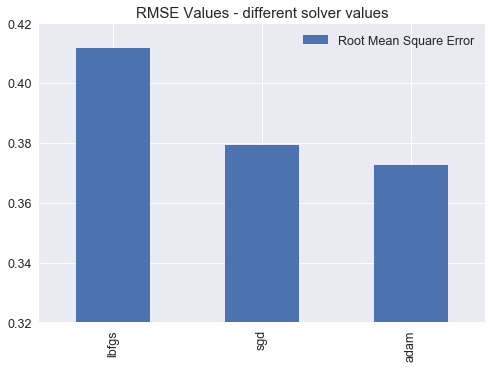

In [15]:
plotNNSolver={}
for k in ['lbfgs','sgd','adam']:
    clf = MLPRegressor(random_state=8,shuffle=True,solver=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNSolver[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNSolver,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different solver values")
axes = plt.gca()
axes.set_ylim([0.320,0.420])
    

(0.32, 0.4)

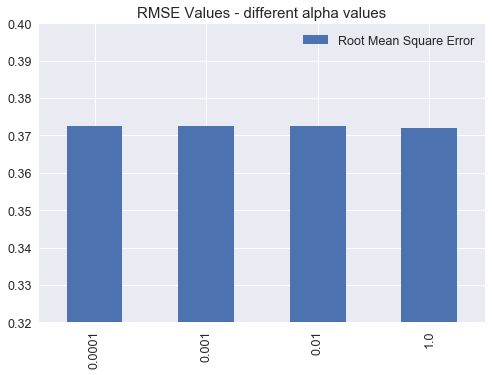

In [16]:
plotNNAlpha={}
for k in [0.0001,0.001,0.01,1]:
    clf = MLPRegressor(random_state=8,shuffle=True,alpha=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNAlpha[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNAlpha,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different alpha values")
axes = plt.gca()
axes.set_ylim([0.320,0.4])
    

(0.32, 0.4)

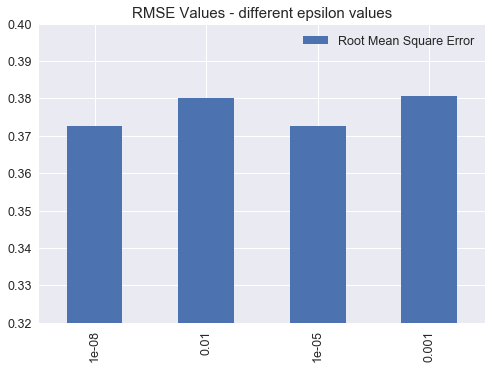

In [17]:
plotNNEps={}
for k in [1e-08,1e-02,1e-05,1e-03]:
    clf = MLPRegressor(random_state=8,shuffle=True,epsilon=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNEps[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNEps,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different epsilon values")
axes = plt.gca()
axes.set_ylim([0.320,0.4])
    

# Graph of errors (RMSE) of the three models (10 bins)

(0.35, 0.41)

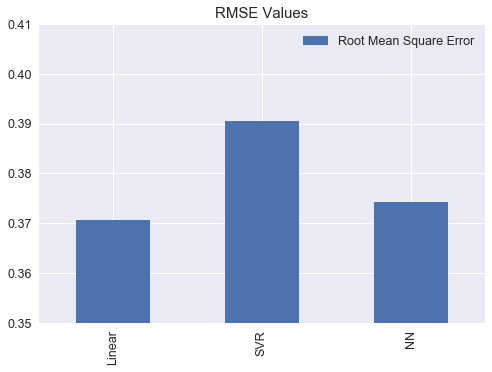

In [18]:
results = pd.DataFrame.from_dict(result10,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values")
axes = plt.gca()
axes.set_ylim([0.350,0.410])

# B.5 : Comparing RMSE of various models (10 bins)

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor as AndaBooster
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn
import warnings
warnings.filterwarnings('ignore')

,Root Mean Square Error
Linear,0.370565
Ridge,0.371336
Bayesian Ridge,0.372561
Hubber,0.371359
Lasso,0.370630
Bagging,0.419736
RandomForest,0.425582
AdaBoost,0.371956
SVR RBF,0.386991
SVR Linear,0.379127


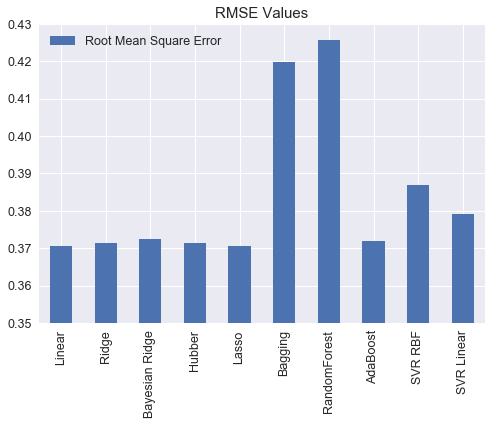

In [20]:
from sklearn import model_selection
def all_models(train,labels):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=10,shuffle=True,random_state=8)
        scoring = 'neg_mean_squared_error'
        results = cross_val_score(clf, train, labels, cv=cv,scoring=scoring)
        clf.fit(X_train,y_train)
        #scores=[np.sqrt(results.mean())]
        pred = clf.predict(X_test)
        scores=[np.sqrt(mean_squared_error(y_test, pred))]
        #print(scores)
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AndaBooster()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVR RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVR Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Root Mean Square Error"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="RMSE Values")
    axes = plt.gca()
    #axes.set_ylim([0.301,0.360])
    axes.set_ylim([0.350,0.430])
    return results

#lets_try(X,y)

all_models(X_train,y_train)

# Comparing Mean Absolute Error of various models (10 bins)

,Mean Absolute Error
Linear,0.311920
Ridge,0.311268
Bayesian Ridge,0.310519
Hubber,0.313526
Lasso,0.311334
Bagging,0.344032
RandomForest,0.361892
AdaBoost,0.318256
SVR RBF,0.324440
SVR Linear,0.316951


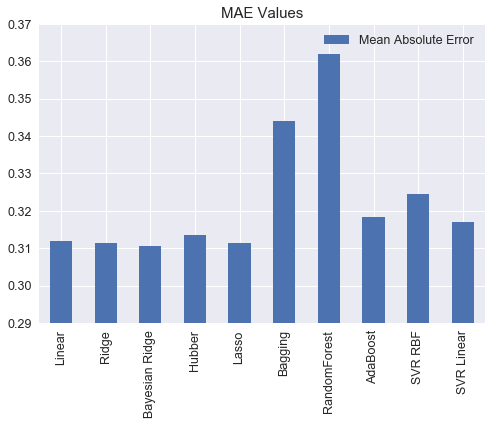

In [21]:
from sklearn import model_selection
def all_models(train,labels):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=10,shuffle=True,random_state=8)
        scoring = 'neg_mean_squared_error'
        results = cross_val_score(clf, train, labels, cv=cv,scoring=scoring)
        clf.fit(X_train,y_train)
        #scores=[np.sqrt(results.mean())]
        pred = clf.predict(X_test)
        scores=[metrics.mean_absolute_error(y_test, pred)]
        #print(scores)
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AndaBooster()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVR RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVR Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Mean Absolute Error"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="MAE Values")
    axes = plt.gca()
    axes.set_ylim([0.290,0.370])
    return results

#lets_try(X,y)

all_models(X_train,y_train)

#                    Part  2  (Using the 16 bins dataset in our models)

# A.1 : Correlation matrix for 16 bin data

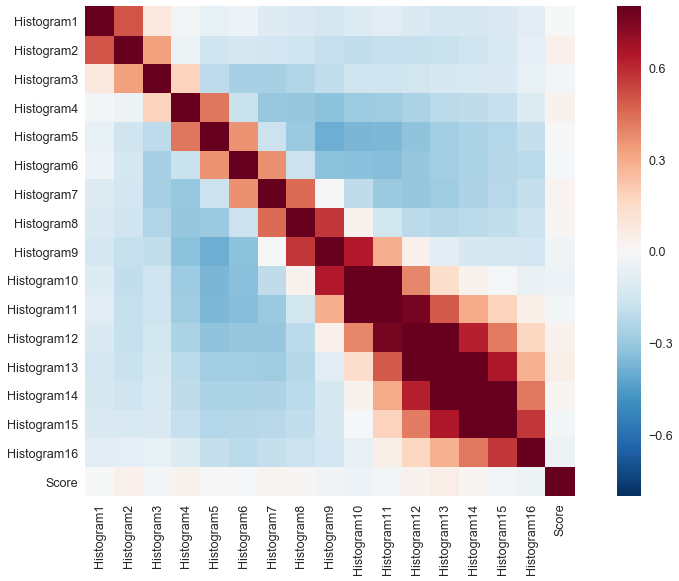

In [22]:

data = pd.read_csv("./ML_ANNOTATOR/hist16bin.csv")

# create a Python list of feature names
feature_names = ['Histogram1','Histogram2','Histogram3','Histogram4','Histogram5','Histogram6','Histogram7','Histogram8','Histogram9','Histogram10','Histogram11','Histogram12','Histogram13','Histogram14','Histogram15','Histogram16','Score']

# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
y = data.Score

# Splitting X and y into training and testing sets # random=101
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=108)


import numpy as np
import seaborn as sns
#correlation matrix
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

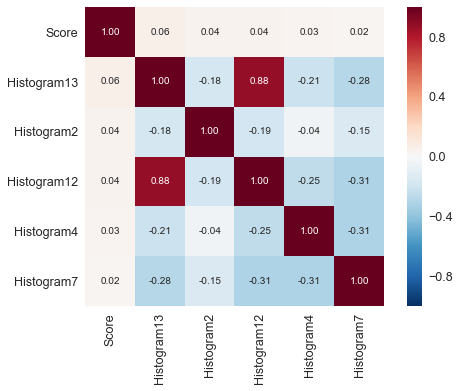

['Histogram13', 'Histogram2', 'Histogram12', 'Histogram4', 'Histogram7']


In [23]:
#saleprice correlation matrix
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Score')['Score'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

feat=list(cols)

feat.remove('Score')
print(feat)

In [24]:
df = pd.read_csv("./ML_ANNOTATOR/hist16bin.csv")
print(df.values)

bins=16
header=[]
for i in range(1,bins+1,1):
    stringHeader="Histogram"+str(i)
    header.append(stringHeader)
#header.append("Score")
print(header)



# ************************************************************************************
# NEWLY ADDED TRY TO REMOVE -1's
df = df[df.Score != -1]

# **********************************************************************

#df.Score=np.log1p(df.Score)
df=np.log1p(df)

# Normalization

df = (df - df.mean()) / df.std()  
df.head()  







# feature_names = feat

feature_names = feat
X = df[feature_names]
# X is feature vector,y is target variable
y = df.Score


#train.SalePrice = np.log1p(train.SalePrice)
# Rescale data (between 0 and 1)

scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
numpy.set_printoptions(precision=3)

y = scaler.fit_transform(y)

# Splitting X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(rescaledX, rescaledy,test_size=0.3, random_state=108)
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y,test_size=0.3,random_state=121)




[[  785  2202  3074 ...,    51    34     2]
 [    0     0     1 ...,    19    13     2]
 [   48  1698 27016 ...,     0     0     0]
 ..., 
 [  207  2699  1327 ...,     0     0     2]
 [ 3417 18003  4557 ...,   459  1825     1]
 [  715  1695  9541 ...,     4     0     0]]
['Histogram1', 'Histogram2', 'Histogram3', 'Histogram4', 'Histogram5', 'Histogram6', 'Histogram7', 'Histogram8', 'Histogram9', 'Histogram10', 'Histogram11', 'Histogram12', 'Histogram13', 'Histogram14', 'Histogram15', 'Histogram16']


# A.2 : Regression models on 16 bin data using the top 5 highly correlated features

,Root Mean Square Error
Linear,0.371373
Ridge,0.371233
Bayesian Ridge,0.372549
Hubber,0.371053
Lasso,0.371191
Bagging,0.409432
RandomForest,0.420947
AdaBoost,0.369794
SVR RBF,0.389537
SVR Linear,0.392691


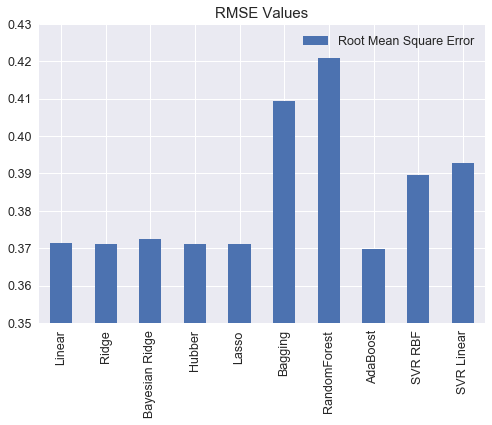

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor as AndaBooster
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn
import warnings
warnings.filterwarnings('ignore')


from sklearn import model_selection
def all_models(train,labels):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=10,shuffle=True,random_state=8)
        scoring = 'neg_mean_squared_error'
        results = cross_val_score(clf, train, labels, cv=cv,scoring=scoring)
        clf.fit(X_train,y_train)
        #scores=[np.sqrt(results.mean())]
        pred = clf.predict(X_test)
        scores=[np.sqrt(mean_squared_error(y_test, pred))]
        #print(scores)
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AndaBooster()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVR RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVR Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Root Mean Square Error"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="RMSE Values")
    axes = plt.gca()
    #axes.set_ylim([0.301,0.360])
    axes.set_ylim([0.350,0.430])
    return results

#lets_try(X,y)

all_models(X_train,y_train)

# B : Comparing three different models : Linear,SVR and Neural Networks using     all 16 bins

# B.1 : Reading from csv file to dataframe (16 bins)

In [27]:
df16 = pd.read_csv("./ML_ANNOTATOR/hist16bin.csv")
print(df16.values)

bins=16
header=[]
for i in range(1,bins+1,1):
    stringHeader="Histogram"+str(i)
    header.append(stringHeader)
#header.append("Score")
print(header)

# We ingore the scores with value 1
df16 = df16[df16.Score != -1]


#df.Score=np.log1p(df.Score)
df16=np.log1p(df16)


feature_names = header
X = df16[feature_names]

# X is feature vector,y is target variable

y = df16.Score

#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
numpy.set_printoptions(precision=3)

y = scaler.fit_transform(y)
# Splitting X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(rescaledX, rescaledy,test_size=0.3, random_state=108) # go for 5
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y,test_size=0.3,random_state=5)

result16={}


[[  785  2202  3074 ...,    51    34     2]
 [    0     0     1 ...,    19    13     2]
 [   48  1698 27016 ...,     0     0     0]
 ..., 
 [  207  2699  1327 ...,     0     0     2]
 [ 3417 18003  4557 ...,   459  1825     1]
 [  715  1695  9541 ...,     4     0     0]]
['Histogram1', 'Histogram2', 'Histogram3', 'Histogram4', 'Histogram5', 'Histogram6', 'Histogram7', 'Histogram8', 'Histogram9', 'Histogram10', 'Histogram11', 'Histogram12', 'Histogram13', 'Histogram14', 'Histogram15', 'Histogram16']


# B.2 : Linear Regression on 16 bins

In [28]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

# setting up hyperparameters

hyperparameters = {'linearregression__fit_intercept':[True,False], 'linearregression__normalize':[True,False],'linearregression__copy_X':[True,False]}

# 7. Tune model using cross-validation pipeline

clf = GridSearchCV(make_pipeline(linear_model.LinearRegression()),hyperparameters, cv=10)
 
clf.fit(X_train, y_train)

#print(clf.get_params())

print("The best parameters are")
print(clf.best_params_)

# 9. Evaluate model pipeline on test data

pred = clf.predict(X_test)

# calculate MAE, MSE, RMSE
print("MAE")
print(metrics.mean_absolute_error(y_test, pred))
print("MSE")
print(metrics.mean_squared_error(y_test, pred))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


result16["Linear"]=np.sqrt(metrics.mean_squared_error(y_test, pred))



The best parameters are
{'linearregression__copy_X': True, 'linearregression__fit_intercept': False, 'linearregression__normalize': True}
MAE
0.30779466859
MSE
0.134494390992
RMSE
0.366734769271


# B.3 : SVR 16 bin

In [29]:
# 2. Import libraries and modules



from sklearn.svm import SVR
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn import svm, grid_search
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

 
# hyperparameters to tune the model

hyperparameters = {'svr__C':[0.001, 0.01, 0.1, 1, 10], 'svr__gamma':[0.001, 0.01, 0.1, 1], 'svr__kernel': ['linear','poly','rbf','sigmoid'] }


# Tune model using cross-validation pipeline

clf = GridSearchCV(make_pipeline(svm.SVR()), hyperparameters, cv=10)
 
clf.fit(X_train, y_train)

print("The best parameters are")
print(clf.best_params_)    

# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)

# calculate MAE, MSE, RMSE
print("MAE")
print(metrics.mean_absolute_error(y_test, pred))
print("MSE")
print(metrics.mean_squared_error(y_test, pred))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


result16["SVR"]=np.sqrt(metrics.mean_squared_error(y_test, pred))



The best parameters are
{'svr__C': 0.01, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
MAE
0.328162859749
MSE
0.153372417637
RMSE
0.391627907122


#  Comparing different hyperparameters for SVR (16 bins)

(0.37, 0.4)

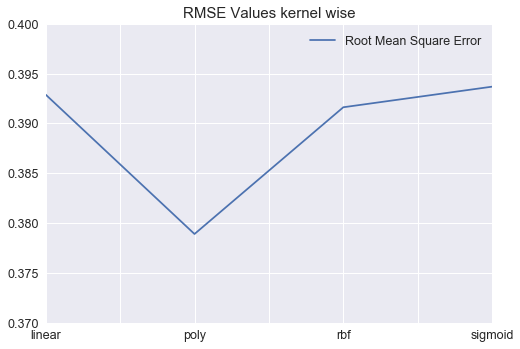

In [30]:
plotSvmKernels={}
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k,C=0.01,gamma=1)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotSvmKernels[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotSvmKernels,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="line",title="RMSE Values kernel wise")
axes = plt.gca()
axes.set_ylim([0.370,0.400])
    

(0.38, 0.4)

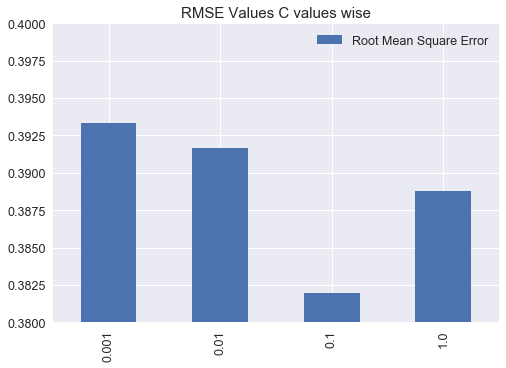

In [31]:
plotSvmCs={}
for k in [0.001, 0.01, 0.1,1]:
    clf = svm.SVR(kernel='rbf',C=k,gamma=1)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotSvmCs[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotSvmCs,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values C values wise")
axes = plt.gca()
axes.set_ylim([0.380,0.400])
    

(0.32, 0.9)

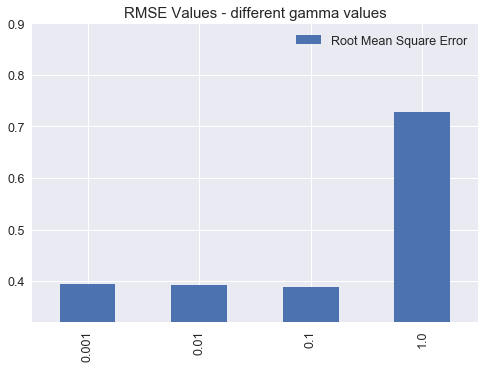

In [32]:
plotSvmgamma={}
for k in [0.001, 0.01, 0.1, 1]:
    clf = svm.SVR(kernel='sigmoid',gamma=k,C=1)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotSvmgamma[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotSvmgamma,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different gamma values")
axes = plt.gca()
axes.set_ylim([0.320,0.9])
    

# B.4 : Neural Network 16 bins

In [33]:
# 2. Import libraries and modules



from sklearn.svm import SVR
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn import svm, grid_search
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

 

from sklearn.neural_network import MLPRegressor 

# hyperparameters to tune

hyperparameters= {'mlpregressor__hidden_layer_sizes': [3,4,5,8,10,12,20,30,50,80],'mlpregressor__activation': ['identity','tanh','relu'] ,'mlpregressor__solver' : ['lbfgs','sgd','adam']}

# Tune model using cross-validation pipeline

clf = GridSearchCV(make_pipeline(preprocessing.MinMaxScaler(),MLPRegressor(random_state = 5,shuffle=True)), hyperparameters, cv=10)
 
clf.fit(X_train, y_train)

#  Evaluate model pipeline on test data
pred = clf.predict(X_test)

print("The best parameters are")
print(clf.best_params_)
 
# calculate MAE, MSE, RMSE
print("MAE")
print(metrics.mean_absolute_error(y_test, pred))
print("MSE")
print(metrics.mean_squared_error(y_test, pred))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))





result16["NN"]=np.sqrt(metrics.mean_squared_error(y_test, pred))



The best parameters are
{'mlpregressor__activation': 'relu', 'mlpregressor__hidden_layer_sizes': 4, 'mlpregressor__solver': 'sgd'}
MAE
0.316506666576
MSE
0.134395922395
RMSE
0.366600494265


# Comparing different hyperparameters for NN (16 bins)

(0.34, 0.46)

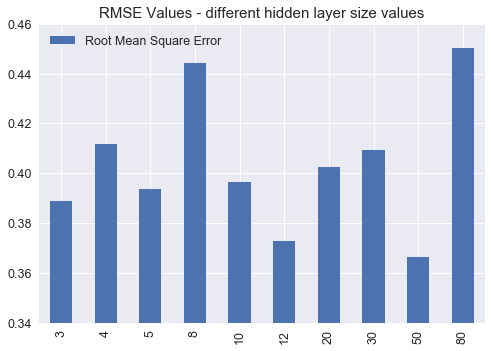

In [34]:
plotNNHiddenLayers={}
for k in [3,4,5,8,10,12,20,30,50,80]:
    clf = MLPRegressor(random_state=8,shuffle=True,hidden_layer_sizes=k,activation='relu',solver='adam')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNHiddenLayers[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNHiddenLayers,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different hidden layer size values")
axes = plt.gca()
axes.set_ylim([0.340,0.460])
    

(0.34, 0.38)

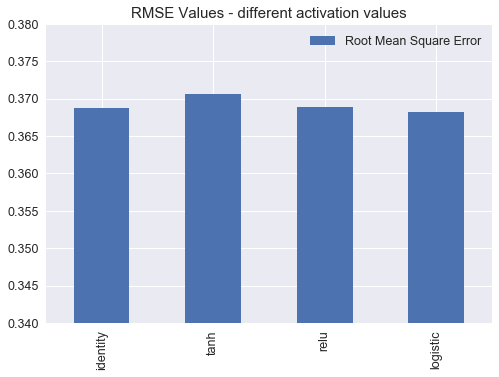

In [35]:
plotNNActivation={}
for k in ['identity','tanh','relu','logistic']:
    clf = MLPRegressor(random_state=8,shuffle=True,activation=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNActivation[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNActivation,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different activation values")
axes = plt.gca()
axes.set_ylim([0.340,0.380])
    

(0.32, 0.47)

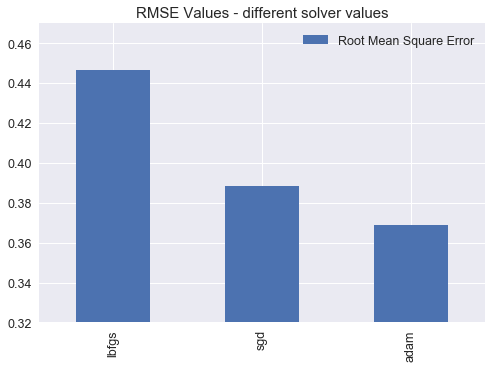

In [36]:
plotNNSolver={}
for k in ['lbfgs','sgd','adam']:
    clf = MLPRegressor(random_state=8,shuffle=True,solver=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNSolver[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNSolver,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different solver values")
axes = plt.gca()
axes.set_ylim([0.320,0.470])
    

(0.34, 0.39)

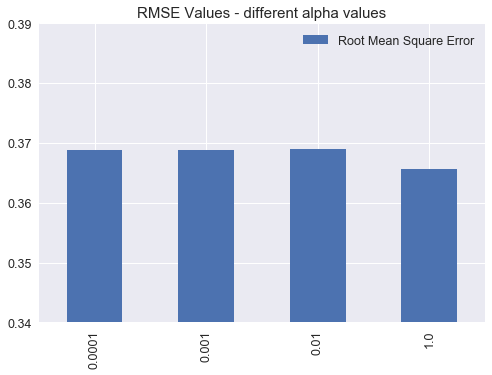

In [37]:
plotNNAlpha={}
for k in [0.0001,0.001,0.01,1]:
    clf = MLPRegressor(random_state=8,shuffle=True,alpha=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNAlpha[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNAlpha,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different alpha values")
axes = plt.gca()
axes.set_ylim([0.340,0.390])
    

(0.32, 0.4)

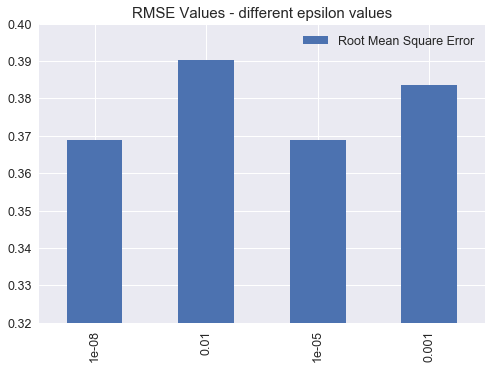

In [38]:
plotNNEps={}
for k in [1e-08,1e-02,1e-05,1e-03]:
    clf = MLPRegressor(random_state=8,shuffle=True,epsilon=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    plotNNEps[k]=np.sqrt(metrics.mean_squared_error(y_test, pred))
    
results = pd.DataFrame.from_dict(plotNNEps,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values - different epsilon values")
axes = plt.gca()
axes.set_ylim([0.320,0.4])
    

# RMSE of both 10 and 16 bin data for the 3 models (Linear,SVR and NN)

In [39]:
print(result10)
print(result16)



{'Linear': 0.37056493060788898, 'SVR': 0.39047029360350899, 'NN': 0.37424754598372029}
{'Linear': 0.36673476927112986, 'SVR': 0.39162790712241558, 'NN': 0.36660049426460922}


# RMSE of 3 models Linear,SVR and NN (16 bin)

(0.35, 0.397)

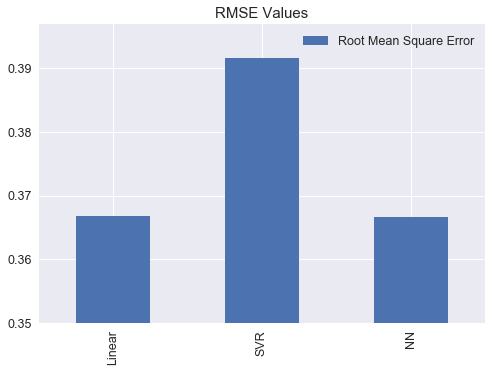

In [40]:
results = pd.DataFrame.from_dict(result16,orient='index')
results.columns=["Root Mean Square Error"] 
#results=results.sort(columns=["R Square Score"],ascending=False)
results.plot(kind="bar",title="RMSE Values")
axes = plt.gca()
axes.set_ylim([0.350,0.397])

# B.5 : A comparision of RMSE for different regression models (16 bin)

,Root Mean Square Error
Linear,0.364442
Ridge,0.365488
Bayesian Ridge,0.367829
Hubber,0.365761
Lasso,0.365082
Bagging,0.381374
RandomForest,0.395837
AdaBoost,0.367651
SVR RBF,0.384483
SVR Linear,0.378546


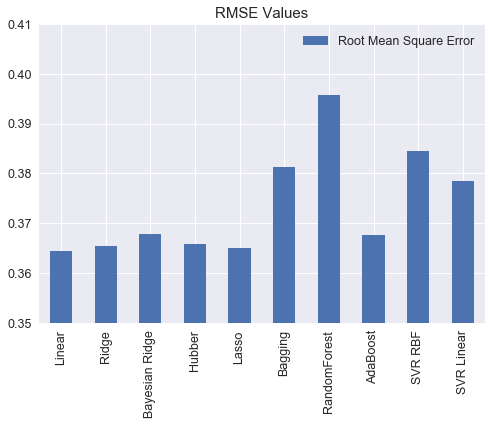

In [41]:
from sklearn import model_selection
def all_models(train,labels):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=10,shuffle=True,random_state=5)
        scoring = 'neg_mean_squared_error'
        results = cross_val_score(clf, train, labels, cv=cv,scoring=scoring)
        clf.fit(X_train,y_train)
        #scores=[np.sqrt(results.mean())]
        pred = clf.predict(X_test)
        scores=[np.sqrt(mean_squared_error(y_test, pred))]
        #print(scores)
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AndaBooster()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVR RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVR Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Root Mean Square Error"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="RMSE Values")
    axes = plt.gca()
    #axes.set_ylim([0.301,0.360])
    axes.set_ylim([0.350,0.410])
    return results

#lets_try(X,y)

all_models(X_train,y_train)

# A comparision of Mean Absolute Error of different models(16 bin)

,Mean Absolute Error
Linear,0.305415
Ridge,0.305576
Bayesian Ridge,0.300997
Hubber,0.307667
Lasso,0.305544
Bagging,0.324273
RandomForest,0.338117
AdaBoost,0.308589
SVR RBF,0.322392
SVR Linear,0.317187


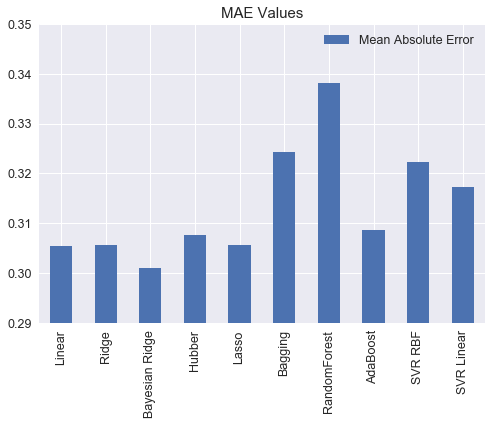

In [42]:
from sklearn import model_selection
def all_models(train,labels):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=10,shuffle=True,random_state=8)
        scoring = 'neg_mean_squared_error'
        results = cross_val_score(clf, train, labels, cv=cv,scoring=scoring)
        clf.fit(X_train,y_train)
        #scores=[np.sqrt(results.mean())]
        pred = clf.predict(X_test)
        scores=[metrics.mean_absolute_error(y_test, pred)]
        #print(scores)
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AndaBooster()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVR RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVR Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Mean Absolute Error"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="MAE Values")
    axes = plt.gca()
    axes.set_ylim([0.290,0.350])
    return results

#lets_try(X,y)

all_models(X_train,y_train)